# ISD - Travail pratique 05 – Régression linéaire
## Objectifs:
- Appliquer l’algorithme de régression linéaire simple pour créer des modèles de régression
- Utiliser la méthode de validation hold-out pour évaluer un modèle de régression
- Utiliser les bibliothèques d’apprentissage automatique pour construire des modèles de régression multiple
- Évaluer les modèles et analyser les résultats

In [20]:
# Import de toutes les librairies nécéssaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

## 1. Régréssion Linéaire simple

#### 1.2 Créez un notebook pour lire la base de données "Boston Housing Dataset" et générez un dataframe.

In [21]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
# Création d'un dataframe en fournissant les données comme premier paramètre et le nom des colonnes comme deuxième.
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# Ajout de la variable dépendente en fin de dataframe
boston_df['MEDV'] = boston_dataset.target
boston_df.head()

d:\PROGRAMS\Miniconda\envs\isd_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 1.3 Se familiariser avec la base de données (p.ex., nombre d’observations, desclasses, d’attributs, statistiques des attributs, données manquantes).

Nous sommes allés chercher des informations sur le dataset sur internet et avons trouvé cette description des attributs : <br>

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

[Source](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)<br>

In [22]:
# Listage des différents attributs et les 5 premières lignes
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
# Nombre d'occurences de chaque attributs, afin de vérifier si les données sont complètes.
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [24]:
# Simple vérification de valeurs manquantes
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [25]:
# Moyenne, Médianne, Maximum et Minimum de chaque attribut.
# Cela sert à vérifier si des données aberrantes sont présentes.
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### Remarques

- Aucune valeur aberrante remarquable ne fut trouvée en regardant les moyennes et les quartiles.
- Aucune valeur ne manque aux attributs.
- Les valeurs furent bien importées dans **boston_df**

#### Générez un histogramme de la distribution de la variable dépendante.

Text(0, 0.5, 'Médianne de la valeur des maisons en milliers de dollars')

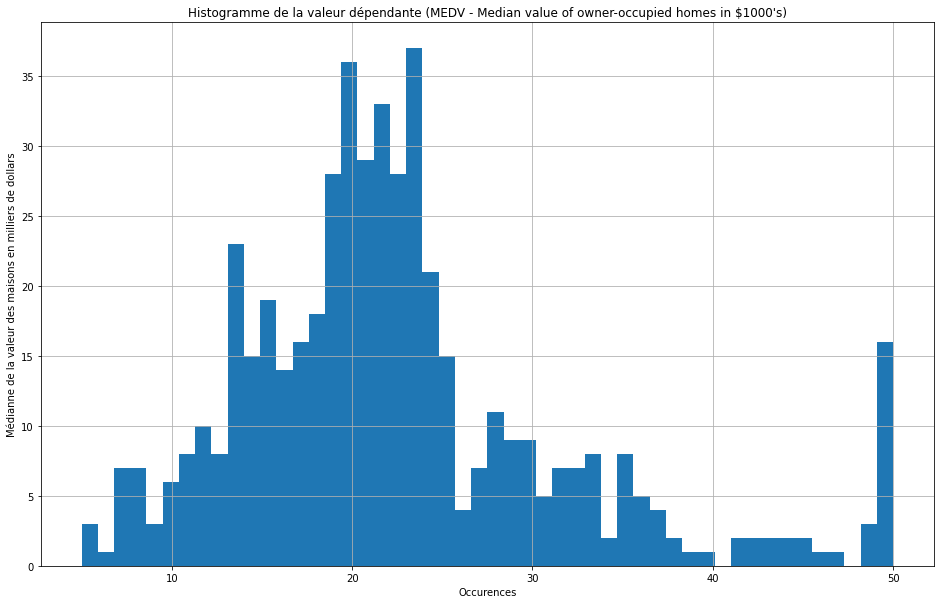

In [26]:
boston_df.hist('MEDV',bins=50,figsize=(16,10))
plt.title("Histogramme de la valeur dépendante (MEDV - Median value of owner-occupied homes in $1000's)")
plt.xlabel("Occurences")
plt.ylabel("Médianne de la valeur des maisons en milliers de dollars")

#### 1.4 Visualiser des boxplots des variables MEDV, RM, LSTAT, RAD, DIS et AGE.

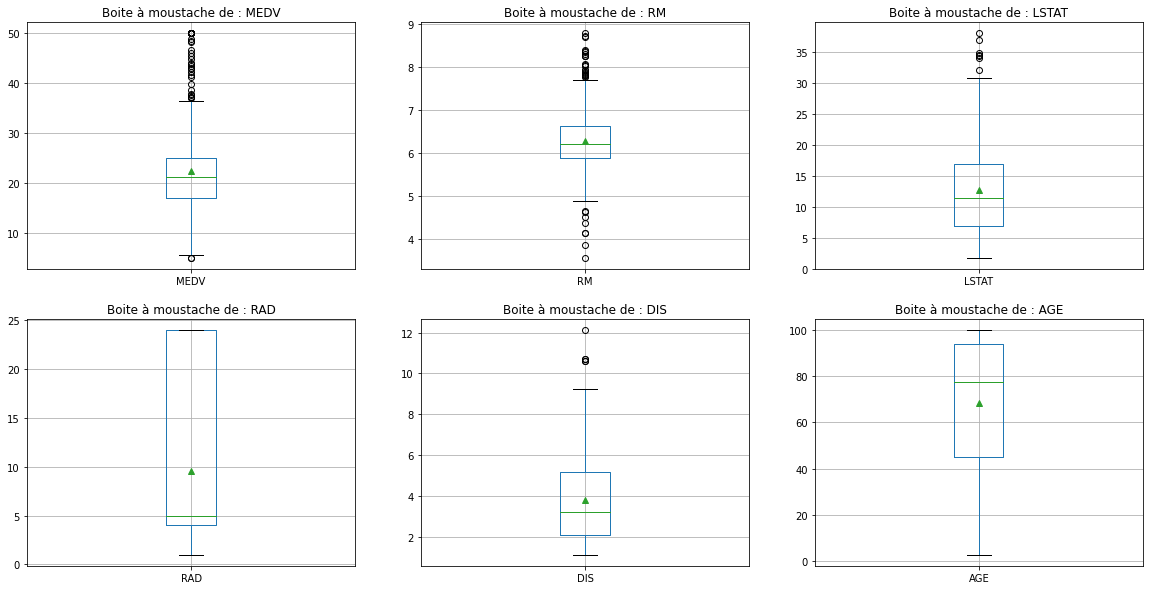

In [27]:
# Création des boites à moustaches
fig, axes = plt.subplots(2,3,figsize=(20,10))
axes=axes.flatten()

bp_attributs = ['MEDV','RM','LSTAT','RAD','DIS','AGE']

for i, ax, a in zip(range(len(axes)),axes,bp_attributs):
    # Plot
    boston_df.boxplot(a,ax=axes[i],showmeans=True)
    axes[i].set_title('Boite à moustache de : ' + a)


##### Scatter-plots (pour avoir un autre point de vue)

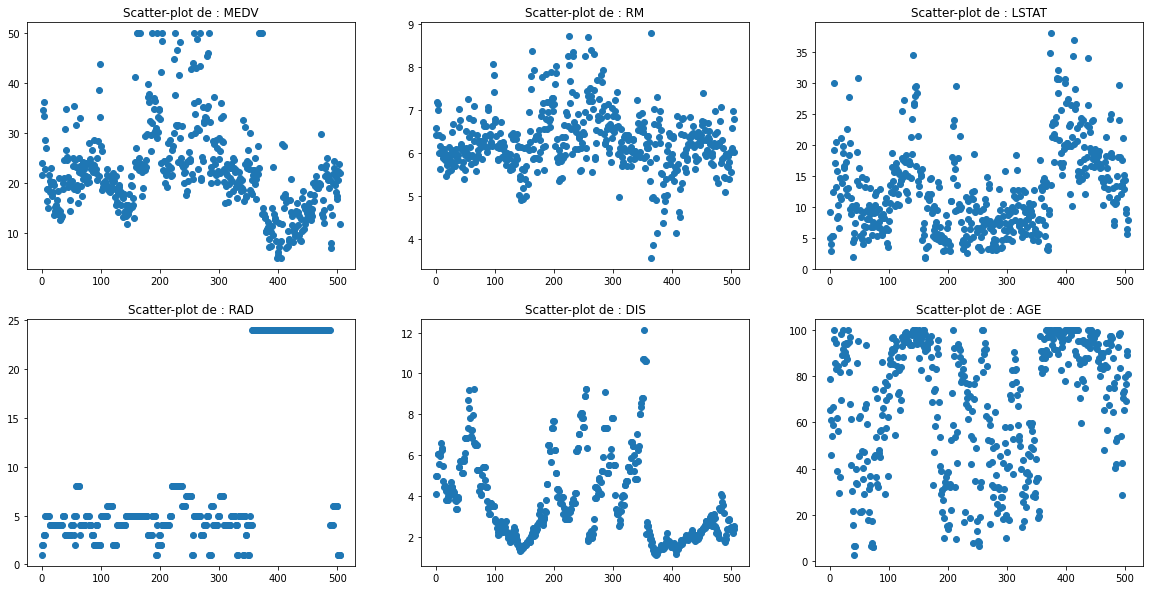

In [28]:
# Création des boites à moustaches
fig, axes = plt.subplots(2,3,figsize=(20,10))
axes=axes.flatten()

sp_attributs = ['MEDV','RM','LSTAT','RAD','DIS','AGE']

for i, ax, a in zip(range(len(axes)),axes,bp_attributs):
    # Plot
    boston_df[a].plot(y=a,ax=axes[i],marker='o',linestyle='none')
    axes[i].set_title('Scatter-plot de : ' + a)

##### Commentaires
Juste au-dessus nous avons généré 6 box-plots pour les différentes variables demandées. Cela nous permets de voir que certains boxplot possèdent des valeurs considérées aberrantes (MEDV, RM, LSTAT, DIS)
et les deux autres restants n'en possèdent pas. On remarque aussi une distribution spécial sur le boxplot de RAD. La boite est extrêmement étendue et la médianne et pourtant très basse, ce qui démontre une concentration de données autour de la valeur 5.

## 1.5 Créez des modèles en utilisant l’algorithme de régression linéaire simple vue en cours pour estimer la valeur MEDV à partir des variables RM, RAD et LSTAT, chaque fois utilisant seulement une des variables.
#### Programmez les fonctions pour faire une validation hold-out (e.g., 80% train + 20% test x 100 fois) et pour calculer le coefficient de détermination afin d’évaluer la performance moyenne du modèle.



In [29]:
# Set du seed pour avoir les mêmes résultats.
random.seed(0)

In [30]:
# Validation Hold-Out splittant en 80% de train et 20% de test.
def train_test_split(dataset, split=0.80):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        idx = random.randrange(len(dataset_copy))
        train.append(dataset_copy.pop(idx))
    return train, dataset_copy

In [31]:
# Descente du gradient pas-à-pas
# Fonctions du PPT du cours
def compute_MSE(b,m,data):
    totalError = 0 # Mean squared error formula
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
    totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
    return totalError/ float(len(data)) # on divise par N

def step_gradient(b_current, m_current, data, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b,new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b, m = step_gradient(b, m, np.array(data), learning_rate)
        print("After {0} epochs b = {1}, m = {2}, error = {3}".format(i, b, m, compute_MSE(b, m, data)))
    return [b, m]

Starting gradient descent at b = [0.03438023], m = [0.51027346], error = [0.15264967]
Running...
After 0 epochs b = [0.03630938], m = [0.52282081], error = [0.14996627]
After 1 epochs b = [0.03823046], m = [0.53531677], error = [0.14731752]
After 2 epochs b = [0.04014349], m = [0.54776155], error = [0.14470308]
After 3 epochs b = [0.04204851], m = [0.56015536], error = [0.14212261]
After 4 epochs b = [0.04394555], m = [0.57249841], error = [0.13957579]
After 5 epochs b = [0.04583464], m = [0.58479091], error = [0.1370623]
After 6 epochs b = [0.04771582], m = [0.59703307], error = [0.1345818]
After 7 epochs b = [0.04958911], m = [0.60922509], error = [0.13213397]
After 8 epochs b = [0.05145456], m = [0.62136717], error = [0.12971851]
After 9 epochs b = [0.05331219], m = [0.63345953], error = [0.12733509]
After 10 epochs b = [0.05516203], m = [0.64550237], error = [0.1249834]
After 11 epochs b = [0.05700412], m = [0.65749588], error = [0.12266313]
After 12 epochs b = [0.05883849], m = [0

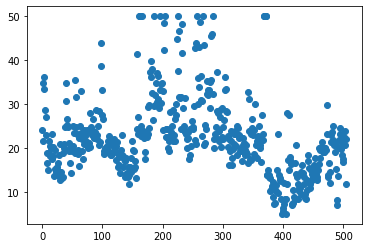

In [56]:
# Utilisation de l'algorithme
# Hyperparamètres
learning_rate = 0.0001
num_epochs = 500

# On initialise la valeur de m et de b
initial_b = np.random.rand(1) # intercept
initial_m = np.random.rand(1) # pente

RM_df = pd.DataFrame()
RM_df['RM'] = boston_df['RM']
RM_df['MEDV'] = boston_df['MEDV']

RM_array = RM_df.to_numpy()

# On applique la méthode du gradient descendant
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m,
compute_MSE(initial_b, initial_m, RM_array)))
print("Running...")
[b, m] = gradient_descent(RM_array, initial_b, initial_m, learning_rate, num_epochs)
print("After {0} epochs b = {1}, m = {2}, error = {3}".format(num_epochs, b, m, compute_MSE(b, m, RM_array)))

RM_df['MEDV'].plot(marker='o', linestyle='none')

x = list()
y = list()
for i in RM_df['RM']:
    x.append(i)

for j in RM_df['RM']:
    y.append(m*j+b)

